In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)

from matplotlib import pyplot as plt
from pylab import *
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.gaussian_process.kernels import Matern
import pandas as pd
import scipy.optimize as opt
import george
from george.kernels import ExpSquaredKernel, Matern32Kernel
rc('text', usetex=True)
rc('font',family='Times New Roman')
rc('xtick', labelsize=13)
rc('ytick', labelsize=13)

import linecache
import pdb
from astropy.io import ascii

In [2]:
tab=pd.read_csv('/Users/lgalbany/Desktop/sn2020jgl/ph_REDUCED/REDUCED.csv')
#print(tab)
tab=tab.sort_values(by='mjd')
tab=tab.reset_index(drop=True)
tmax20jgl=58993.096
z20jgl=0.006758
progid=[]
for i,ii in enumerate(tab['fname']):
    hdul = fits.open(ii)
   # print(hdul[0].header['PROPID'])
    progid.append(hdul[0].header['PROPID'])
tab['prog']=progid 

In [32]:
tmax20jgl=58993.096
z20jgl=0.006758
columns=linecache.getline('/home/lara/ICE/Photometry/ZTF/jgl/2020jgl.txt',56)[0:-1].split(', ')
#lco=ascii.read('/home/lara/ICE/Photometry/ZTF/jgl/2020jgl.txt',names=columns)
lco = pd.read_csv('/home/lara/ICE/Photometry/ZTF/jgl/2020jgl.txt', delim_whitespace=True, comment='#',names=columns,header=0)
#pdb.set_trace()
lco['mjd']=lco['jd']-2400000.5
lco=lco.sort_values(by='mjd')
lco=lco.reset_index(drop=True)

In [25]:
ztf=pd.read_csv('/Users/lgalbany/Desktop/sn2020jgl/SN2020jgl_ztf.txt', delim_whitespace=True)
SNT=3.0
SNU=5.0

good=(ztf['forcediffimflux']/ztf['forcediffimfluxunc'] >= SNT)
bad=(ztf['forcediffimflux']/ztf['forcediffimfluxunc'] < SNT)

ztf['mag']=ztf['forcediffimflux']*np.nan
ztf['emag']=ztf['forcediffimflux']*np.nan

ztf['mag'][good] = ztf['zpdiff'][good] - 2.5*np.log10(ztf['forcediffimflux'][good])
ztf['emag'][good] = 1.0857* ztf['forcediffimfluxunc'][good] / ztf['forcediffimflux'][good]
ztf['mag'][bad] = ztf['zpdiff'][bad] - 2.5*np.log10(SNU*ztf['forcediffimfluxunc'][bad])

ztfg=ztf['mag'][ztf['filter'] == 'ZTF_g']
ztfr=ztf['mag'][ztf['filter'] == 'ZTF_r']
eztfg=ztf['emag'][ztf['filter'] == 'ZTF_g']
eztfr=ztf['emag'][ztf['filter'] == 'ZTF_r']
mjdg=ztf['jd'][ztf['filter'] == 'ZTF_g']-2400000.5
mjdr=ztf['jd'][ztf['filter'] == 'ZTF_r']-2400000.5

#plt.scatter(mjdg,ztfg,color='green')
#plt.scatter(mjdr,ztfr,color='red')
#plt.xlim(58895,59260)
#plt.ylim(22,18)
#plt.show()

<ipython-input-25-f4271d9c216d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ztf['mag'][good] = ztf['zpdiff'][good] - 2.5*np.log10(ztf['forcediffimflux'][good])
<ipython-input-25-f4271d9c216d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ztf['emag'][good] = 1.0857* ztf['forcediffimfluxunc'][good] / ztf['forcediffimflux'][good]
<ipython-input-25-f4271d9c216d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ztf['mag'][bad] = 

In [22]:
ztf2=pd.read_csv('/Users/lgalbany/Desktop/sn2020jgl/ZTF20acogywb_2021-02-07T20_53_32.425Z.csv')
ztfg2=ztf2['magpsf_corr'][ztf2['fid'] == 1]
ztfr2=ztf2['magpsf_corr'][ztf2['fid'] == 2]
eztfg2=ztf2['sigmapsf_corr'][ztf2['fid'] == 1]
eztfr2=ztf2['sigmapsf_corr'][ztf2['fid'] == 2]
mjdg2=ztf2['mjd'][ztf2['fid'] == 1]
mjdr2=ztf2['mjd'][ztf2['fid'] == 2]


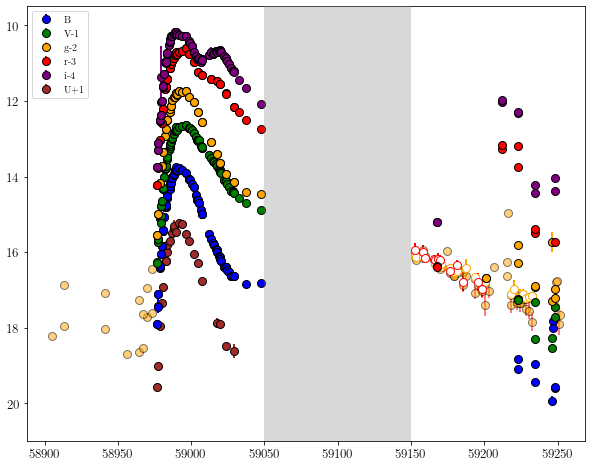

In [23]:
fig,ax=plt.subplots(1,1,figsize=(10,8))

plt.fill([59050,59050,59150,59150],[22,5,5,22], 'gray',alpha=0.3,zorder=100) 

#plt.errorbar(tab['mjd'][tab['prog']=='SUPA2020A-002'],tab['B'][tab['prog']=='SUPA2020A-002']  ,yerr=tab['B_err'][tab['prog']=='SUPA2020A-002'],label='B         ',ecolor='blue'  ,mfc='blue',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
#plt.errorbar(tab['mjd'][tab['prog']=='KEY2017AB-001'],tab['B'][tab['prog']=='KEY2017AB-001']  ,yerr=tab['B_err'][tab['prog']=='KEY2017AB-001'],label='_no_label_',ecolor='blue'  ,mfc='blue',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2)
#plt.errorbar(tab['mjd'][tab['prog']=='SUPA2020A-002'],tab['V'][tab['prog']=='SUPA2020A-002']-1,yerr=tab['V_err'][tab['prog']=='SUPA2020A-002'],label='V-1       ',ecolor='green' ,mfc='green',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
#plt.errorbar(tab['mjd'][tab['prog']=='KEY2017AB-001'],tab['V'][tab['prog']=='KEY2017AB-001']-1,yerr=tab['V_err'][tab['prog']=='KEY2017AB-001'],label='_no_label_',ecolor='green' ,mfc='green',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2)
#plt.errorbar(tab['mjd'][tab['prog']=='SUPA2020A-002'],tab['g'][tab['prog']=='SUPA2020A-002']-2,yerr=tab['g_err'][tab['prog']=='SUPA2020A-002'],label='g-2       ',ecolor='orange',mfc='orange',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
#plt.errorbar(tab['mjd'][tab['prog']=='KEY2017AB-001'],tab['g'][tab['prog']=='KEY2017AB-001']-2,yerr=tab['g_err'][tab['prog']=='KEY2017AB-001'],label='_no_label_',ecolor='orange',mfc='orange',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2)
#plt.errorbar(tab['mjd'][tab['prog']=='SUPA2020A-002'],tab['r'][tab['prog']=='SUPA2020A-002']-3,yerr=tab['r_err'][tab['prog']=='SUPA2020A-002'],label='r-3       ',ecolor='red'   ,mfc='red',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
#plt.errorbar(tab['mjd'][tab['prog']=='KEY2017AB-001'],tab['r'][tab['prog']=='KEY2017AB-001']-3,yerr=tab['r_err'][tab['prog']=='KEY2017AB-001'],label='_no_label_',ecolor='red'   ,mfc='red',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2)
#plt.errorbar(tab['mjd'][tab['prog']=='SUPA2020A-002'],tab['i'][tab['prog']=='SUPA2020A-002']-4,yerr=tab['i_err'][tab['prog']=='SUPA2020A-002'],label='i-4       ',ecolor='purple',mfc='purple',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
#plt.errorbar(tab['mjd'][tab['prog']=='KEY2017AB-001'],tab['i'][tab['prog']=='KEY2017AB-001']-4,yerr=tab['i_err'][tab['prog']=='KEY2017AB-001'],label='_no_label_',ecolor='purple',mfc='purple',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2)

plt.errorbar(tab['mjd'],tab['B']  ,yerr=tab['B_err'],label='B         ',ecolor='blue'  ,mfc='blue',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
plt.errorbar(tab['mjd'],tab['V']-1,yerr=tab['V_err'],label='V-1       ',ecolor='green' ,mfc='green',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
plt.errorbar(tab['mjd'],tab['g']-2,yerr=tab['g_err'],label='g-2       ',ecolor='orange',mfc='orange',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
plt.errorbar(tab['mjd'],tab['r']-3,yerr=tab['r_err'],label='r-3       ',ecolor='red'   ,mfc='red',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
plt.errorbar(tab['mjd'],tab['i']-4,yerr=tab['i_err'],label='i-4       ',ecolor='purple',mfc='purple',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)

plt.errorbar(mjdg                                    ,ztfg                                  -2,yerr=eztfg                                     ,label='_no_label_',ecolor='orange',mfc='orange',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,alpha=0.5)
plt.errorbar(mjdr                                    ,ztfr                                  -3,yerr=eztfr                                     ,label='_no_label_',ecolor='red'   ,mfc='orange',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,alpha=0.5)
plt.errorbar(mjdg2                                    ,ztfg2                                  -2,yerr=eztfg2                                     ,label='_no_label_',ecolor='orange',mfc='white',mec='orange',marker='o',markersize=8,linewidth=0,elinewidth=2)
plt.errorbar(mjdr2                                    ,ztfr2                                  -3,yerr=eztfr2                                     ,label='_no_label_',ecolor='red'   ,mfc='white',mec='red',marker='o',markersize=8,linewidth=0,elinewidth=2)

plt.errorbar(lco['mjd'][lco['filt']=='U']            ,lco['m'][lco['filt']=='U']            +1,yerr=lco['em'][lco['filt']=='U']               ,label='U+1       ',ecolor='brown' ,mfc='brown' ,mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2)
#plt.errorbar(lco['mjd'][lco['filt']=='B'],lco['m'][lco['filt']=='B']  ,yerr=lco['em'][lco['filt']=='B'],label='B-JB',ecolor='blue'  ,mfc='blue'  ,mec='black',marker='p',markersize=8,linewidth=0,elinewidth=2,alpha=0.3)
#plt.errorbar(lco['mjd'][lco['filt']=='V'],lco['m'][lco['filt']=='V']-1,yerr=lco['em'][lco['filt']=='V'],label='V-JB',ecolor='green' ,mfc='green' ,mec='black',marker='p',markersize=8,linewidth=0,elinewidth=2,alpha=0.3)
#plt.errorbar(lco['mjd'][lco['filt']=='g'],lco['m'][lco['filt']=='g']-2,yerr=lco['em'][lco['filt']=='g'],label='g-JB',ecolor='orange',mfc='orange',mec='black',marker='p',markersize=8,linewidth=0,elinewidth=2,alpha=0.3)
#plt.errorbar(lco['mjd'][lco['filt']=='r'],lco['m'][lco['filt']=='r']-3,yerr=lco['em'][lco['filt']=='r'],label='r-JB',ecolor='red'   ,mfc='red'   ,mec='black',marker='p',markersize=8,linewidth=0,elinewidth=2,alpha=0.3)
#plt.errorbar(lco['mjd'][lco['filt']=='i'],lco['m'][lco['filt']=='i']-4,yerr=lco['em'][lco['filt']=='i'],label='i-JB',ecolor='purple',mfc='purple',mec='black',marker='p',markersize=8,linewidth=0,elinewidth=2,alpha=0.3)

plt.legend()
plt.ylim(21.0,9.5)  
#plt.xlim(58975,59050)  
plt.show()

In [17]:
tU=lco['mjd'][lco['filt']=='U']
U =lco['m'][lco['filt']=='U']
eU=lco['em'][lco['filt']=='U']
tB=tab['mjd']
B =tab['B']
eB=tab['B_err']
tV=tab['mjd']
V =tab['V']
eV=tab['V_err']
tg=tab['mjd']
g =tab['g']
eg=tab['g_err']
tr=tab['mjd']
r =tab['r']
er=tab['r_err']
ti=tab['mjd']
i =tab['i']
ei=tab['i_err']

tU=np.array(tU[(np.isfinite(U))&(U>0)])
eU=np.array(eU[(np.isfinite(U))&(U>0)])
U=np.array(  U[(np.isfinite(U))&(U>0)])
tB=np.array(tB[(np.isfinite(B))&(B>0)])
eB=np.array(eB[(np.isfinite(B))&(B>0)])
B=np.array(  B[(np.isfinite(B))&(B>0)])
tV=np.array(tV[(np.isfinite(V))&(V>0)])
eV=np.array(eV[(np.isfinite(V))&(V>0)])
V=np.array(  V[(np.isfinite(V))&(V>0)])
tg=np.array(tg[(np.isfinite(g))&(g>0)])
eg=np.array(eg[(np.isfinite(g))&(g>0)])
g=np.array(  g[(np.isfinite(g))&(g>0)])
tr=np.array(tr[(np.isfinite(r))&(r>0)])
er=np.array(er[(np.isfinite(r))&(r>0)])
r=np.array(  r[(np.isfinite(r))&(r>0)])
ti=np.array(ti[(np.isfinite(i))&(i>0)])
ei=np.array(ei[(np.isfinite(i))&(i>0)])
i=np.array(  i[(np.isfinite(i))&(i>0)])


# SCIPY/GEORGE

In [18]:
def gausproc_scipy(ep,m,em,tmax):

    x = np.atleast_2d(np.linspace(-16.5, 37, 100)).T
    kernel = Matern(length_scale=15000, length_scale_bounds=(1e-05, 100000.0), nu=1.5)
    
    flux = 10.**(- 0.4 * (m-48.6))
    dyf = em * 0.921034 *  flux 
    
    y = flux/max(flux)
    dyf = dyf/max(flux)
    X = ep-tmax
    X = np.atleast_2d(X).T
    
    gp = GaussianProcessRegressor(kernel=kernel, alpha= (dyf / y) ** 2, n_restarts_optimizer=500)
    gp.fit(X, y)
    y_pred, sigma = gp.predict(x, return_std=True)
    m_pred = -2.5*np.log10(y_pred*max(flux))+48.6
    em_pred= 2.5*np.log10(1.+sigma/y_pred)
    
    return x+tmax,m_pred,em_pred

def gausproc_george(ep,m,em,tmax):

    gp = george.GP(Matern32Kernel(100)) # + WhiteKernel(0.001))
    x = np.linspace(-16.5, 37, 100)
    
    def ll(p):
        gp.set_parameter_vector(p)
        return -gp.lnlikelihood(Yg, quiet=True)
    
    def grad_ll(p):
        gp.set_parameter_vector(p)
        return -gp.grad_lnlikelihood(Yg, quiet=True)
    
    flux = 10.**(- 0.4 * (m-48.6))
    Y_err = em * 0.921034 * flux 
    Xg = ep-tmax
    norm = max(flux)
    Yg = flux/norm
    Y_err /= norm
    
    gp.compute(Xg, Y_err)
    p0 = gp.get_parameter_vector()
    results = opt.minimize(ll, p0, jac=grad_ll)
    mu, cov = gp.predict(Yg, x)
    std = np.sqrt(np.diag(cov))
    m_pred = -2.5*np.log10(mu*max(flux))+48.6
    em_pred= 2.5*log10(1.+std/mu)

    return x+tmax,m_pred,em_pred


In [19]:
tgp,Ugp,eUgp=gausproc_george(tU,U,eU,tmax20jgl)
tgp,Bgp,eBgp=gausproc_george(tB,B,eB,tmax20jgl)
tgp,Vgp,eVgp=gausproc_george(tV,V,eV,tmax20jgl)
tgp,ggp,eggp=gausproc_george(tg,g,eg,tmax20jgl)
tgp,rgp,ergp=gausproc_george(tr,r,er,tmax20jgl)
tgp,igp,eigp=gausproc_george(ti,i,ei,tmax20jgl)


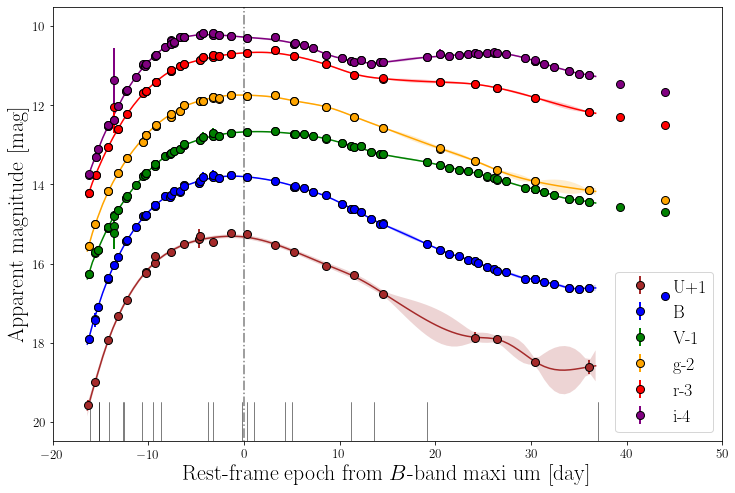

In [20]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
plt.plot([0.0,0.0],[-30,30],'-.',color='grey')

plt.errorbar((tU-tmax20jgl)/(1.+z20jgl), U+1, eU, label='U+1',ecolor='brown' ,mfc='brown',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
plt.errorbar((tB-tmax20jgl)/(1.+z20jgl), B  , eB, label='B  ',ecolor='blue'  ,mfc='blue',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
plt.errorbar((tV-tmax20jgl)/(1.+z20jgl), V-1, eV, label='V-1',ecolor='green' ,mfc='green',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
plt.errorbar((tg-tmax20jgl)/(1.+z20jgl), g-2, eg, label='g-2',ecolor='orange',mfc='orange',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
plt.errorbar((tr-tmax20jgl)/(1.+z20jgl), r-3, er, label='r-3',ecolor='red'   ,mfc='red',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)
plt.errorbar((ti-tmax20jgl)/(1.+z20jgl), i-4, ei, label='i-4',ecolor='purple',mfc='purple',mec='black',marker='o',markersize=8,linewidth=0,elinewidth=2,zorder=10)

plt.fill((np.concatenate([tgp, tgp[::-1]])-tmax20jgl)/(1.+z20jgl),np.concatenate([Ugp - eUgp, (Ugp + eUgp)[::-1]])+1,alpha=.2, fc='brown' , ec='None', label='_no_label_')
plt.fill((np.concatenate([tgp, tgp[::-1]])-tmax20jgl)/(1.+z20jgl),np.concatenate([Bgp - eBgp, (Bgp + eBgp)[::-1]])  ,alpha=.2, fc='blue'  , ec='None', label='_no_label_')
plt.fill((np.concatenate([tgp, tgp[::-1]])-tmax20jgl)/(1.+z20jgl),np.concatenate([Vgp - eVgp, (Vgp + eVgp)[::-1]])-1,alpha=.2, fc='green' , ec='None', label='_no_label_')
plt.fill((np.concatenate([tgp, tgp[::-1]])-tmax20jgl)/(1.+z20jgl),np.concatenate([ggp - eggp, (ggp + eggp)[::-1]])-2,alpha=.2, fc='orange', ec='None', label='_no_label_')
plt.fill((np.concatenate([tgp, tgp[::-1]])-tmax20jgl)/(1.+z20jgl),np.concatenate([rgp - ergp, (rgp + ergp)[::-1]])-3,alpha=.2, fc='red'   , ec='None', label='_no_label_')
plt.fill((np.concatenate([tgp, tgp[::-1]])-tmax20jgl)/(1.+z20jgl),np.concatenate([igp - eigp, (igp + eigp)[::-1]])-4,alpha=.2, fc='purple', ec='None', label='_no_label_')
plt.plot((tgp-tmax20jgl)/(1.+z20jgl),Ugp+1, color='brown' ,ls='-', label='_no_label_')
plt.plot((tgp-tmax20jgl)/(1.+z20jgl),Bgp  , color='blue'  ,ls='-', label='_no_label_')
plt.plot((tgp-tmax20jgl)/(1.+z20jgl),Vgp-1, color='green' ,ls='-', label='_no_label_')
plt.plot((tgp-tmax20jgl)/(1.+z20jgl),ggp-2, color='orange',ls='-', label='_no_label_')
plt.plot((tgp-tmax20jgl)/(1.+z20jgl),rgp-3, color='red'   ,ls='-', label='_no_label_')
plt.plot((tgp-tmax20jgl)/(1.+z20jgl),igp-4, color='purple',ls='-', label='_no_label_')
plt.ylim(20.5,9.5)
plt.xlim(-20,50)
plt.legend(fontsize=18)

plt.ylabel(r'Apparent magnitude [mag]', fontsize=22)
plt.xlabel(r'Rest-frame epoch from $B$-band maxi um [day]', fontsize=22)

spep=[-16.09204165, -15.16952601, -15.11694156, -14.10597276, -12.62546875,
 -12.542074  , -10.63341025,  -9.55407247,  -8.65199739,  -3.8109746, 
 -3.20401164,  -0.22198823,   0.29053196,   1.07689721,   4.28304132,
   5.05285282,  11.21202138,  13.55023214,  19.16011086,  37.00684273]
for imjd in spep:
    plt.plot([imjd,imjd],[19.5,100],color='black',alpha=1.0,label='_nolegend_',linewidth=0.5)

plt.savefig('20jgl_LC.pdf',format='pdf', bbox_inches="tight")      
plt.show()

In [21]:
file = np.array([tU, U, eU])
file = file.T
#print(flux)
with open('sn2020jgl_U.txt', 'w+') as datafile_id:
    np.savetxt(datafile_id, file, fmt=['%f','%f','%f'])
file = np.array([tB, B, eB])
file = file.T
#print(flux)
with open('sn2020jgl_B.txt', 'w+') as datafile_id:
    np.savetxt(datafile_id, file, fmt=['%f','%f','%f'])
file = np.array([tV, V, eV])
file = file.T
#print(flux)
with open('sn2020jgl_V.txt', 'w+') as datafile_id:
    np.savetxt(datafile_id, file, fmt=['%f','%f','%f'])
file = np.array([tg, g ,eg])
file = file.T
#print(flux)
with open('sn2020jgl_g.txt', 'w+') as datafile_id:
    np.savetxt(datafile_id, file, fmt=['%f','%f','%f'])
file = np.array([tr, r ,er])
file = file.T
#print(flux)
with open('sn2020jgl_r.txt', 'w+') as datafile_id:
    np.savetxt(datafile_id, file, fmt=['%f','%f','%f'])
file = np.array([ti, i, ei])
file = file.T
#print(flux)
with open('sn2020jgl_i.txt', 'w+') as datafile_id:
    np.savetxt(datafile_id, file, fmt=['%f','%f','%f'])    

In [22]:
print((58976.720100-tmax20jgl)/(1.+z20jgl))
print((58977.87731936-tmax20jgl)/(1.+z20jgl))

-16.265974544030534
-15.116523176372711


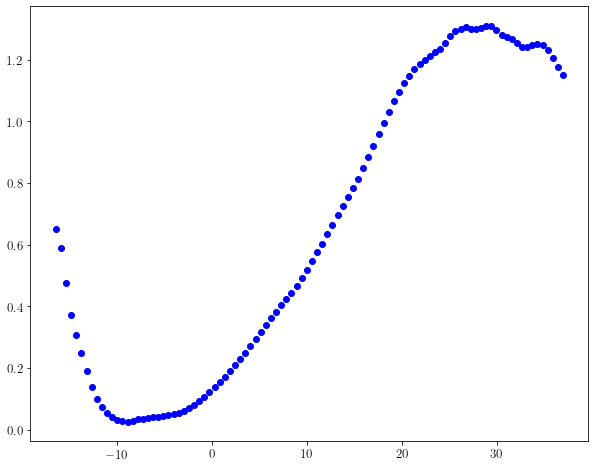

In [23]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
plt.scatter(tgp-tmax20jgl,Bgp-Vgp,label='B-V LCOGT',color='blue')
plt.show()

NameError: name 'BX' is not defined

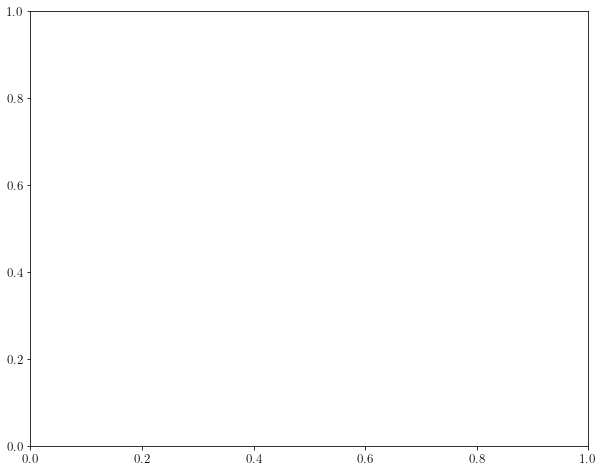

In [24]:

fig,ax=plt.subplots(1,1,figsize=(10,8))
plt.errorbar(BX, By, Bdyf, fmt='.', markersize=10, label=u'B Observations',color='blue')
plt.errorbar(VX, Vy, Vdyf, fmt='.', markersize=10, label=u'V Observations',color='green')

#plt.fill(np.concatenate([x, x[::-1]]),np.concatenate([By_pred - Bsigma, (By_pred + Bsigma)[::-1]]),alpha=.2, fc='blue', ec='None', label=u'S 68$\%$ confidence interval')
#plt.plot(x, By_pred, color='blue',ls='-', label=u'S Prediction')
#plt.fill(np.concatenate([x, x[::-1]]),np.concatenate([Vy_pred - Vsigma, (Vy_pred + Vsigma)[::-1]]),alpha=.2, fc='green', ec='None', label=u'S 68$\%$ confidence interval')
#plt.plot(x, Vy_pred, color='green',ls='-', label=u'S Prediction')

plt.fill_between(t, Bmu+Bstd, Bmu-Bstd, color='blue', alpha=0.2,label='G 68$\%$ confidence interval')
plt.plot(t, Bmu,color='blue',ls='-', label=u'G prediction')
plt.fill_between(t, Vmu+Vstd, Vmu-Vstd, color='green', alpha=0.2,label='G 68$\%$ confidence interval')
plt.plot(t, Vmu,color='green',ls='-', label=u'G prediction')

plt.xlabel('Phase (day)',size=20)
plt.ylabel('Normalised flux',size=20)
#plt.ylim(-20, -22.5)
plt.legend(loc='lower left')

plt.show()

NameError: name 'BX' is not defined

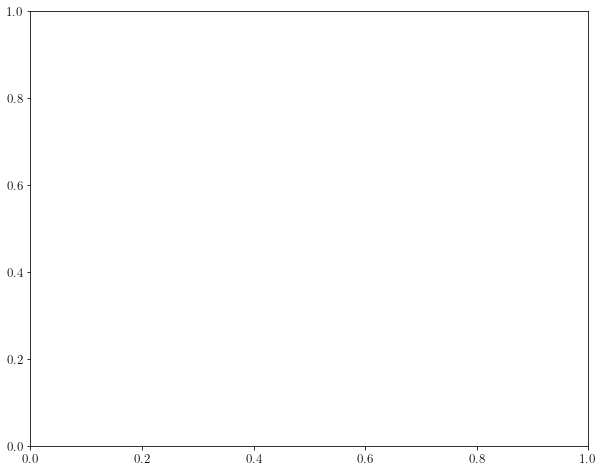

In [25]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
plt.errorbar(BX, B, eB, fmt='.', markersize=10, label=u'B Observations',color='blue')
plt.errorbar(VX, V, eV, fmt='.', markersize=10, label=u'V Observations',color='green')

#plt.fill(np.concatenate([x, x[::-1]]),np.concatenate([B_pred - eB_pred, (B_pred + eB_pred)[::-1]]),alpha=.2, fc='blue', ec='None', label=u'S 68$\%$ confidence interval')
#plt.plot(x, B_pred, color='blue',ls='-', label=u'S Prediction')
#plt.fill(np.concatenate([x, x[::-1]]),np.concatenate([V_pred - eV_pred, (V_pred + eV_pred)[::-1]]),alpha=.2, fc='green', ec='None', label=u'S 68$\%$ confidence interval')
#plt.plot(x, V_pred, color='green',ls='-', label=u'S Prediction')

plt.fill_between(t, B_gpred+eB_gpred, B_gpred-eB_gpred, color='blue', alpha=0.2,label='G 68$\%$ confidence interval')
plt.plot(t, B_gpred,color='blue',ls='-', label=u'G prediction')
plt.fill_between(t, V_gpred+eV_gpred, V_gpred-eV_gpred, color='green', alpha=0.2,label='G 68$\%$ confidence interval')
plt.plot(t, V_gpred,color='green',ls='-', label=u'G prediction')

plt.xlabel('Phase (day)',size=20)
plt.ylabel('Normalised flux',size=20)
plt.ylim(18,13)
plt.legend(loc='lower left')

plt.show()